In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

In [37]:
with open('data_to_file.log', "r") as file:
    log_lines = file.readlines()

Read log file and store as a log_lines

In [38]:
log_entries = []
log_pattern = r'^(?P<timestamp>.*?) - (?P<level>\w+) - (?P<message>.*)$'

for line in log_lines:
    match = re.match(log_pattern, line.strip())
    if match:
        log_entries.append(match.groupdict())

Initialize empty list for log entries and use regex to parse log entries into timestamp, level, and message

In [39]:
log_df = pd.DataFrame(log_entries)
timestamp_format = '%Y-%m-%d %H:%M:%S,%f'
log_df['timestamp'] = pd.to_datetime(log_df['timestamp'], format=timestamp_format)


log_df


,timestamp,level,message
0,2024-09-23 18:42:02.010,INFO,API response status code: 200
1,2024-09-23 18:42:02.011,INFO,"API response content: {""state"":""inWar"",""teamSi..."
2,2024-09-23 18:42:02.014,INFO,Response recorded for inWar at 2024-09-23 18:4...
3,2024-09-23 18:56:01.469,INFO,API response status code: 200
4,2024-09-23 18:56:01.469,INFO,"API response content: {""state"":""inWar"",""teamSi..."
5,2024-09-23 18:56:01.470,INFO,Response recorded for inWar at 2024-09-23 18:5...
6,2024-09-23 19:11:01.840,INFO,API response status code: 200
7,2024-09-23 19:11:01.840,INFO,"API response content: {""state"":""inWar"",""teamSi..."
8,2024-09-23 19:11:01.841,INFO,Response recorded for inWar at 2024-09-23 19:1...
9,2024-09-24 17:02:00.843,INFO,API response status code: 200


Create dataframe for analysis and convert timestamp into datetime object

In [40]:
log_df.describe()

,timestamp
count,18
mean,2024-09-25 04:06:11.886888960
min,2024-09-23 18:42:02.010000
25%,2024-09-23 18:56:01.469250048
50%,2024-09-24 06:06:31.342000128
75%,2024-09-26 17:02:01.846000128
max,2024-09-27 14:35:05.276000


Look at preliminary data, this makes sense because there are only 18 entries over a 4 day period

In [41]:
level_counts = log_df['level'].value_counts()
level_counts

level
INFO    18
Name: count, dtype: int64

I have set up logging to capture errors as well, but none have occurred since I set the CRON task

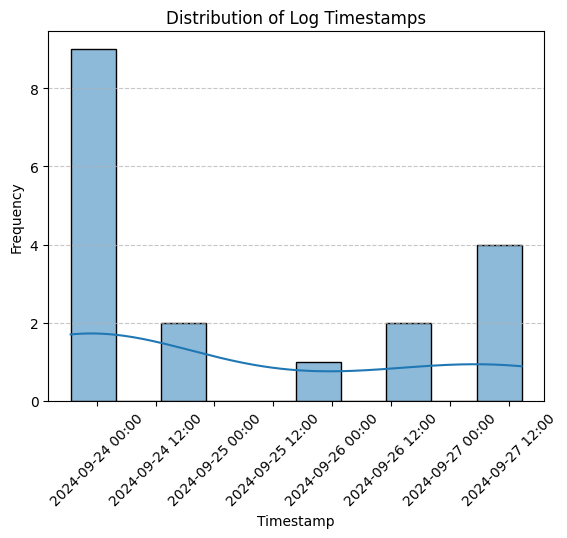

In [42]:
log_df.set_index('timestamp', inplace=True)
sns.histplot(log_df.index, bins=10, kde=True)
plt.title('Distribution of Log Timestamps')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This distribution makes sense because I was setting up the CRON task on 9/24 and had to switch from relative to absolute file paths.
I re-ran the task every few minutes with each change that I made.
Additionally, I made edits to the script on 9/27 and re-ran it to test the changes that I made.

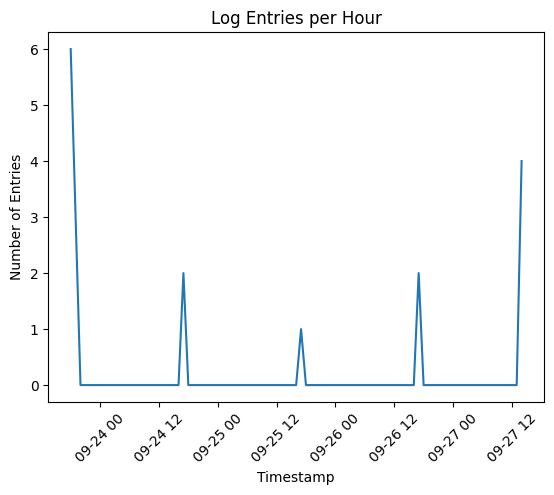

In [43]:
hourly_counts = log_df.resample('h').size().reset_index(name='count')

sns.lineplot(data=hourly_counts, x='timestamp', y='count')
plt.title('Log Entries per Hour')
plt.xlabel('Timestamp')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

The entries per hour makes sense because I have a cron task scheduled at 17:02,
the additional spikes on certain days are from manually running the program
to get intrawar results and to test changes to the program.

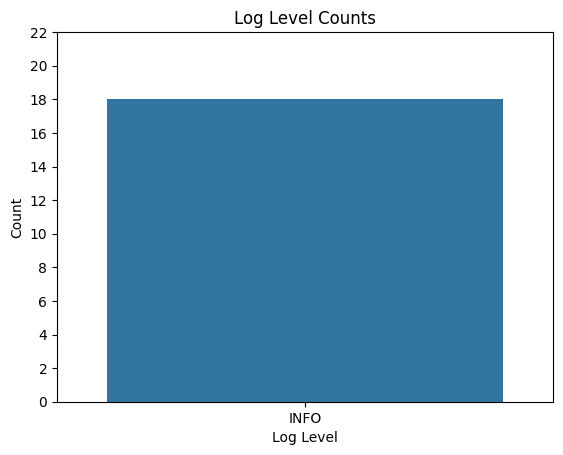

In [44]:
sns.countplot(data=log_df, x='level')
plt.title('Log Level Counts')
plt.xlabel('Log Level')
plt.ylabel('Count')
ticks = [x for x in range(0, 23, 2)]
labels = [str(x) for x in ticks]
plt.yticks(ticks=ticks, labels=labels)
plt.show()


Thankfully there haven't been errors in the few days that I have been runnning the program, but they would display
here if they occur in the future.